In [1]:
import matplotlib.pyplot as plt
import random
from operator import itemgetter
import numpy as np

### Algorithm:

In [95]:
def evolutionary_algorithm_minimalization(t_max, 
                                          population_size, 
                                          pop_arg_num, 
                                          tournament_size, 
                                          elite, 
                                          sigma, 
                                          mutation_prob, 
                                          function_to_minimize,
                                          random_pop):
    
    best_from_epoch = []
    P_list = []
    
    P_t = init_population(population_size, pop_arg_num, function_to_minimize, random_pop)
    t = 0
    x = find_best_individual(P_t)
    while t < t_max:
        P_list.append(P_t)
        R = selection(P_t, tournament_size)
        M = mutation(R, sigma, mutation_prob, function_to_minimize)
        K = recombination(M, function_to_minimize)
        x_t = find_best_individual(K)
        if x_t[-1] < x[-1]:
            x = x_t
        P_t = succession(P_t, K, elite)
        best_from_epoch.append(x_t)
        t += 1

    P_t = evaluate(P_t)
    return x, best_from_epoch, P_list

#### Initialize population

In [81]:
def init_population(population_size, population_dim, function_to_minimize, random_pop):
    # last element of point is value of function
    population = []
    # beggining search area is (-5,5) in every dim
    if random_pop == True:
        for i in range(population_size):
            point = []
            for j in range(population_dim):
                dim = random.random()*10-5
                point.append(dim)
            value = function_to_minimize(point)
            point.append(value)

            population.append(point)
    else:
        point = []
        for j in range(population_dim):
            dim = random.random()*10-5
            point.append(dim)
        value = function_to_minimize(point)
        point.append(value)
        for i in range(population_size):
            population.append(point)
    
    return population

#### Tournament Selection

In [82]:
def selection(P_t, tournament_size):
    R = []
    for o in P_t:
        tournament_participants = random.choices(P_t, k=tournament_size)
        tournament_participants.append(o)
        winner = min(tournament_participants, key=itemgetter(-1))
        R.append(winner)
    return R

#### Mutation 

In [83]:
def mutation(R, sigma, mutation_prob, function_to_minimize):
    M = []
    for o in R:
        new_o = o
        if random.random()<mutation_prob:
            new_o = []
            for gen in o[:-1]:
                new_gen = gen + sigma*random.gauss(0, 1)
                new_o.append(new_gen)
            new_o_value = function_to_minimize(new_o)
            new_o.append(new_o_value)
        M.append(new_o)
    return M

#### Recombination

In [84]:
def recombination(M, function_to_minimize):

    K = []
    alfa = 0.1
    i = 0
    while i<len(M)-1:
        parent_1 = M[i]
        parent_2 = M[i+1]
        child_1 = []
        child_2 = []
        for j, parent_1_gen in enumerate(parent_1[:-1]):
            parent_2_gen = parent_2[j]
            child_1_gen = alfa * parent_1_gen + (1 - alfa) * parent_2_gen
            child_2_gen = alfa * parent_2_gen + (1 - alfa) * parent_1_gen
            child_1.append(child_1_gen)
            child_2.append(child_2_gen)
        child_1_value = function_to_minimize(child_1)
        child_2_value = function_to_minimize(child_2)
        child_1.append(child_1_value)
        child_2.append(child_2_value)
        K.append(child_1)
        K.append(child_2)
        
        i+=2
    return(K)

In [85]:
def succession(P_t, K, k):
    P_t_1 = K
    elite = find_k_best(P_t, k)
    for e in elite:
        P_t_1.append(e)
    P_t_1 = evaluate(P_t_1)
    P_t_1 = P_t_1[:-k]

    return P_t_1

In [86]:
def evaluate(population):
    return sorted(population, key=itemgetter(-1))

In [87]:
def find_k_best(population, k):
    pop = evaluate(population)
    return population[:k]

In [88]:
 def bird_function(args):
    x, y = args
    return np.sin(x)*(np.exp(1-np.cos(y))**2)+np.cos(y)*(np.exp(1-np.sin(x))**2)+(x-y)**2

In [89]:
def find_best_individual(pop):
    return min(pop, key=itemgetter(-1))

In [90]:
t_max = 50
pop_size = 10
pop_arg_num = 2
tournament_size = 2
elite = 1
sigma = 0.1
mutation_prob = 0.5
function_to_minimize = bird_function

x, best_x_in_epoch = evolutionary_algorithm_minimalization(t_max, 
                                      pop_size,
                                      pop_arg_num,
                                      tournament_size,
                                      elite, sigma,
                                      mutation_prob,
                                      function_to_minimize)
f_celu1 = []
for x_t in best_x_in_epoch:
    f_celu1.append(x_t[-1])
plt.plot(f_celu1)
plt.show()
print('x: ', x[0])
print('y: ', x[1])
print('z: ', x[-1])

ValueError: too many values to unpack (expected 2)

### Experiments

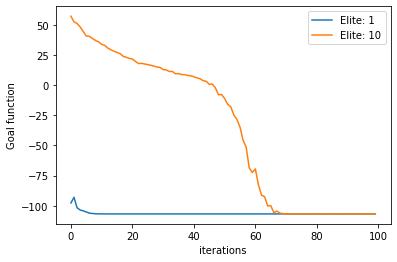

In [100]:
t_max = 100
pop_size = 100
pop_arg_num = 2
tournament_size = 2
elite = 1
sigma = 0.1
mutation_prob = 0.5
function_to_minimize = bird_function
random_pop = True
x, best_x_in_epoch, P_list = evolutionary_algorithm_minimalization(t_max, pop_size,pop_arg_num,tournament_size,elite, sigma,mutation_prob,function_to_minimize, random_pop)
f_celu = []
for x_t in best_x_in_epoch:
    f_celu.append(x_t[-1])
plt.figure(1)
plt.plot(f_celu, label='Init population: r')


random_pop = False
x, best_x_in_epoch, P_list = evolutionary_algorithm_minimalization(t_max, pop_size,pop_arg_num,tournament_size,elite, sigma,mutation_prob,function_to_minimize, random_pop)
f_celu = []
for x_t in best_x_in_epoch:
    f_celu.append(x_t[-1])
plt.plot(f_celu, label='Init population: Clones')
plt.legend()


# x, best_x_in_epoch, P_list = evolutionary_algorithm_minimalization(t_max, pop_size,pop_arg_num,tournament_size,elite, sigma,mutation_prob,function_to_minimize, random_pop)
# f_celu = []
# for x_t in best_x_in_epoch:
#     f_celu.append(x_t[-1])
# plt.plot(f_celu, label='Elite: 20')
# plt.legend()
# plt.grid()

plt.xlabel('iterations')
plt.ylabel('Goal function')
plt.show()

In [93]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = bird_function([X,Y])

Text(0.5, 1.0, 'Simplest default with labels')

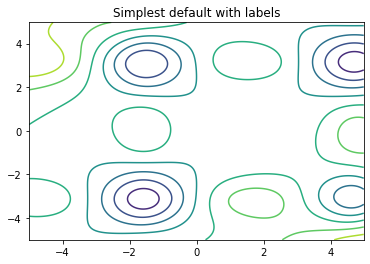

In [15]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
# ax.set_title('')

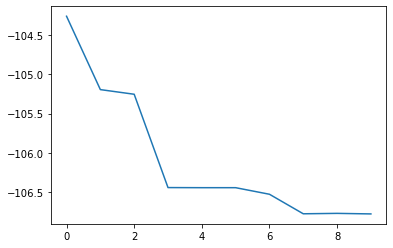

In [67]:
t_max = 10
pop_size = 50
pop_arg_num = 2
tournament_size = 4
elite = 10
sigma = 0.1
mutation_prob = 0.1
function_to_minimize = bird_function
x, best_x_in_epoch, P_list = evolutionary_algorithm_minimalization(t_max, pop_size,pop_arg_num,tournament_size,elite, sigma,mutation_prob,function_to_minimize)
f_celu = []
for x_t in best_x_in_epoch:
    f_celu.append(x_t[-1])
plt.figure(1)
plt.plot(f_celu, label='Elite: 1')

In [52]:
x_list = []
y_list = []
for P in P_list:
    P_x = []
    P_y = []
    for o in P:
        P_x.append(o[0])
        P_y.append(o[1])
    x_list.append(P_x)
    y_list.append(P_y)


Text(0.5, 1.0, 'Pokolenie 6')

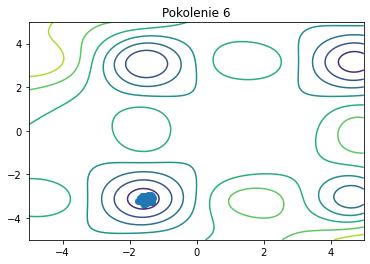

In [74]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
plt.scatter(x_list[5], y_list[5])
ax.set_title('Pokolenie 6')

[[-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413], [-1.5074827466211738, 4.28241707780264, -6.119057275654413]]
